<h1> EV Vehicle & Taxi data Analysis </h1>

<h2> Installing the libraries </h2>

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h2> Reading the dataset </h2>

In [3]:
ev_ds = pd.read_csv("C:\\Users\\Nikhil Thakur\\Downloads\\archive\\ev_stations_v1.csv")
taxi_data = pd.read_csv("C:\\Users\\Nikhil Thakur\\Downloads\\yellow_tripdata_2018-01.csv")

c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (6,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
zone_lookup = pd.read_csv("C:/Users/Nikhil Thakur/Downloads/taxi+_zone_lookup.csv")
zone_lookup.head(5)

# Keeping the string before the "/" to make it easy for coordinate search
zone_lookup["Zone"] = zone_lookup["Zone"].str.split("/",n = 1, expand=True)[0]

# Since the data is only for NYC adding the string ", New York" to all zones
zone_lookup["Zone"] = zone_lookup["Zone"]+", New York"

In [5]:
taxi_data.head(5)
# ev_ds.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55


zone_lookup.head(5)

## Mapping zones on the locationIDs

In [6]:
# Creating a dictionary to map the values
location_ls, zone_ls  = list(zone_lookup.loc[:,("LocationID")]), list(zone_lookup.loc[:,("Zone")])
map_dict = dict(zip(location_ls, zone_ls))

# Mapping the values
taxi_data["Pickup_zone"] = taxi_data["PULocationID"].map(map_dict)
taxi_data["Drop_zone"] = taxi_data["DOLocationID"].map(map_dict)
taxi_data.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Pickup_zone,Drop_zone
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80,"Central Harlem, New York","Bloomingdale, New York"
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30,"Upper West Side South, New York","Lenox Hill East, New York"
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30,"Yorkville East, New York","Lenox Hill West, New York"
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80,"Lenox Hill East, New York","Windsor Terrace, New York"
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55,"West Chelsea, New York","Upper West Side South, New York"


In [7]:
# Checking the data types of the columns
taxi_data.dtypes

# Changing the datatype for the timestamp columns
import datetime as dt
tz_format = "%Y-%m-%d %H:%M:%S"
taxi_data["PU_timestamp"] = pd.to_datetime(taxi_data["tpep_pickup_datetime"], format=tz_format)
taxi_data["DF_timestamp"] = pd.to_datetime(taxi_data["tpep_dropoff_datetime"], format=tz_format)
taxi_data["trip_time"] = (taxi_data["DF_timestamp"] - taxi_data["PU_timestamp"]).dt.seconds

In [8]:
taxi_data.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Pickup_zone,Drop_zone,PU_timestamp,DF_timestamp,trip_time
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,...,0.5,0.00,0.0,0.3,5.80,"Central Harlem, New York","Bloomingdale, New York",2018-01-01 00:21:05,2018-01-01 00:24:23,198
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,1,N,239,140,2,...,0.5,0.00,0.0,0.3,15.30,"Upper West Side South, New York","Lenox Hill East, New York",2018-01-01 00:44:55,2018-01-01 01:03:05,1090
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,1,N,262,141,1,...,0.5,1.00,0.0,0.3,8.30,"Yorkville East, New York","Lenox Hill West, New York",2018-01-01 00:08:26,2018-01-01 00:14:21,355
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,1,N,140,257,2,...,0.5,0.00,0.0,0.3,34.80,"Lenox Hill East, New York","Windsor Terrace, New York",2018-01-01 00:20:22,2018-01-01 00:52:51,1949
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,1,N,246,239,1,...,0.5,2.75,0.0,0.3,16.55,"West Chelsea, New York","Upper West Side South, New York",2018-01-01 00:09:18,2018-01-01 00:27:06,1068


In [9]:
taxi_data["trip_time_sec"] = (taxi_data["DF_timestamp"] - taxi_data["PU_timestamp"]).dt.seconds

In [10]:
taxi_data.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,Pickup_zone,Drop_zone,PU_timestamp,DF_timestamp,trip_time,trip_time_sec
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,...,0.00,0.0,0.3,5.80,"Central Harlem, New York","Bloomingdale, New York",2018-01-01 00:21:05,2018-01-01 00:24:23,198,198
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,1,N,239,140,2,...,0.00,0.0,0.3,15.30,"Upper West Side South, New York","Lenox Hill East, New York",2018-01-01 00:44:55,2018-01-01 01:03:05,1090,1090
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,1,N,262,141,1,...,1.00,0.0,0.3,8.30,"Yorkville East, New York","Lenox Hill West, New York",2018-01-01 00:08:26,2018-01-01 00:14:21,355,355
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,1,N,140,257,2,...,0.00,0.0,0.3,34.80,"Lenox Hill East, New York","Windsor Terrace, New York",2018-01-01 00:20:22,2018-01-01 00:52:51,1949,1949
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,1,N,246,239,1,...,2.75,0.0,0.3,16.55,"West Chelsea, New York","Upper West Side South, New York",2018-01-01 00:09:18,2018-01-01 00:27:06,1068,1068


## Data Aggregation

In [38]:
taxi_df_agg = taxi_data.groupby(["Pickup_zone","Drop_zone", "PULocationID", "DOLocationID"], as_index=False).agg(
    Total_amount=pd.NamedAgg(column="total_amount", aggfunc="sum"),
    no_of_trip = pd.NamedAgg(column="Pickup_zone", aggfunc="count"),
    dist_min=pd.NamedAgg(column="trip_distance", aggfunc="min"),
    dist_max=pd.NamedAgg(column="trip_distance", aggfunc="max"),
    dist_avg=pd.NamedAgg(column="trip_distance", aggfunc="mean"),
    time_minimum_sec=pd.NamedAgg(column="trip_time_sec", aggfunc="min"),
    time_max_sec=pd.NamedAgg(column="trip_time_sec", aggfunc="max"),
    time_avg_sec=pd.NamedAgg(column="trip_time_sec", aggfunc="mean")    
)
taxi_df_agg

,Pickup_zone,Drop_zone,PULocationID,DOLocationID,Total_amount,no_of_trip,dist_min,dist_max,dist_avg,time_minimum_sec,time_max_sec,time_avg_sec
0,"Allerton, New York","Allerton, New York",3,3,82.67,5,0.00,19.10,4.484000,51,732,317.800000
1,"Allerton, New York","Bedford Park, New York",3,18,12.30,1,2.70,2.70,2.700000,787,787,787.000000
2,"Allerton, New York","Bronxdale, New York",3,32,22.42,3,0.59,1.74,1.043333,270,518,399.333333
3,"Allerton, New York","Central Harlem North, New York",3,42,28.30,1,9.26,9.26,9.260000,1909,1909,1909.000000
4,"Allerton, New York","Claremont, New York",3,47,23.30,1,6.20,6.20,6.200000,1388,1388,1388.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
24653,"Yorkville West, New York","Woodlawn, New York",263,259,744.10,20,10.40,14.53,11.297500,1005,2357,1394.000000
24654,"Yorkville West, New York","Woodside, New York",263,260,2149.45,103,4.17,8.08,5.238738,586,2221,1117.019417
24655,"Yorkville West, New York","World Trade Center, New York",263,261,5746.08,187,5.84,16.10,8.050535,725,39375,1570.449198
24656,"Yorkville West, New York","Yorkville East, New York",263,262,67946.71,9899,0.00,9.18,0.634269,7,86324,369.246186


In [118]:
# Getting the geolocation for pickup and dropoff zone
from geopy.geocoders import Nominatim
 
# calling the Nominatim tool
loc = Nominatim(user_agent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.99 Safari/537.36")

In [14]:
# entering the location name
getLoc = loc.geocode("1315 Morreene Road, Durham, NC 27705")
print("Latitude = {}, Longitude = {}".format(getLoc.latitude, getLoc.longitude))

Latitude = 36.0048583, Longitude = -78.953243


In [15]:
from geopy.extra.rate_limiter import RateLimiter
# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(loc.geocode, min_delay_seconds=1)
# 2- - create location column
zone_lookup['location'] = zone_lookup['Zone'].apply(geocode)

# View the results
zone_lookup

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Bensonhurst East, New York',), **{}).
Traceback (most recent call last):
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\http\client.py", line 1331, in getresponse
    response.begin()
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\http\client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\http\client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "

RateLimiter swallowed an error after 2 retries. Called with (*('Bensonhurst East, New York',), **{}).
Traceback (most recent call last):
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\http\client.py", line 1331, in getresponse
    response.begin()
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\http\client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\http\client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Financial District North, New York',), **{}).
Traceback (most recent call last):
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\http\client.py", line 1331, in getresponse
    response.begin()
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\http\client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\http\client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Greenwich Village North, New York',), **{}).
Traceback (most recent call last):
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\http\client.py", line 1331, in getresponse
    response.begin()
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\http\client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\http\client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE 

RateLimiter swallowed an error after 2 retries. Called with (*('Greenwich Village North, New York',), **{}).
Traceback (most recent call last):
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\http\client.py", line 1331, in getresponse
    response.begin()
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\http\client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\http\client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Springfield Gardens North, New York',), **{}).
Traceback (most recent call last):
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\http\client.py", line 1331, in getresponse
    response.begin()
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\http\client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\http\client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLIN

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Springfield Gardens South, New York',), **{}).
Traceback (most recent call last):
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\http\client.py", line 1331, in getresponse
    response.begin()
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\http\client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\http\client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLIN

RateLimiter swallowed an error after 2 retries. Called with (*('Springfield Gardens South, New York',), **{}).
Traceback (most recent call last):
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\http\client.py", line 1331, in getresponse
    response.begin()
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\http\client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\http\client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE +

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Sunset Park West, New York',), **{}).
Traceback (most recent call last):
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\http\client.py", line 1331, in getresponse
    response.begin()
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\http\client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\http\client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Westchester Village, New York',), **{}).
Traceback (most recent call last):
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\http\client.py", line 1331, in getresponse
    response.begin()
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\http\client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\http\client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1)

RateLimiter swallowed an error after 2 retries. Called with (*('Westchester Village, New York',), **{}).
Traceback (most recent call last):
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\http\client.py", line 1331, in getresponse
    response.begin()
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\http\client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\http\client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "

,LocationID,Borough,Zone,service_zone,location
0,1,EWR,"Newark Airport, New York",EWR,None
1,2,Queens,"Jamaica Bay, New York",Boro Zone,"(Jamaica Bay, Queens County, New York, 11693, ..."
2,3,Bronx,"Allerton, New York",Boro Zone,"(Allerton Avenue, The Bronx, Bronx County, New..."
3,4,Manhattan,"Alphabet City, New York",Yellow Zone,"(Alphabet City, Manhattan Community Board 3, M..."
4,5,Staten Island,"Arden Heights, New York",Boro Zone,"(Arden Heights Woods, Richmond County, New Yor..."
...,...,...,...,...,...
258,259,Bronx,"Woodlawn, New York",Boro Zone,"(Woodlawn, Bronx River Greenway, Bronx County,..."
259,260,Queens,"Woodside, New York",Boro Zone,"(Woodside, Queens, Queens County, New York, 11..."
260,261,Manhattan,"World Trade Center, New York",Yellow Zone,"(World Trade Center, Greenwich Street, Financi..."
261,262,Manhattan,"Yorkville East, New York",Yellow Zone,"(Yorkville, Manhattan, New York County, New Yo..."


In [16]:
# Splitting the dataset into two parts
# 1. Locations are detected
zone_lookup_final = zone_lookup.loc[list(~np.array(zone_lookup["location"].isna())), :]
zone_lookup_final['point'] = zone_lookup_final['location'].apply(lambda loc: tuple(loc.point) if loc else None)
zone_lookup_final[['latitude', 'longitude', 'altitude']] = pd.DataFrame(zone_lookup_final['point'].tolist(), index=zone_lookup_final.index)

c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [18]:
# 2. Locations not detected
zone_lookup_2 = zone_lookup.loc[zone_lookup["location"].isna(), :]

# Making string adjustments to make it easy to detect the location on the Nomantin
zone_lookup_2["Zone"] = zone_lookup_2["Zone"].str.split(",",n = 1, expand=True)[0]
zone_lookup_2['location'] = zone_lookup_2['Zone'].apply(geocode)

#zone_lookup.location.lo
zone_lookup_2['point'] = zone_lookup_2['location'].apply(lambda loc: tuple(loc.point) if loc else None)
zone_lookup_2[['latitude', 'longitude', 'altitude']] = pd.DataFrame(zone_lookup_2['point'].tolist(), index=zone_lookup_2.index)

c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\nikhil thakur\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [24]:
zone_lookup_2 = zone_lookup_2.dropna()

# Appending the two parts back
zone_look_main = pd.concat([zone_lookup_final,zone_lookup_2])

In [26]:
zone_look_main.head(5)

,LocationID,Borough,Zone,service_zone,location,point,latitude,longitude,altitude
1,2,Queens,"Jamaica Bay, New York",Boro Zone,"(Jamaica Bay, Queens County, New York, 11693, ...","(40.6039936, -73.8354124, 0.0)",40.603994,-73.835412,0.0
2,3,Bronx,"Allerton, New York",Boro Zone,"(Allerton Avenue, The Bronx, Bronx County, New...","(40.8654299, -73.8673652, 0.0)",40.865430,-73.867365,0.0
3,4,Manhattan,"Alphabet City, New York",Yellow Zone,"(Alphabet City, Manhattan Community Board 3, M...","(40.7251022, -73.9795833, 0.0)",40.725102,-73.979583,0.0
4,5,Staten Island,"Arden Heights, New York",Boro Zone,"(Arden Heights Woods, Richmond County, New Yor...","(40.5574414, -74.18858101238035, 0.0)",40.557441,-74.188581,0.0
5,6,Staten Island,"Arrochar, New York",Boro Zone,"(Arrochar, Staten Island, Richmond County, New...","(40.5984379, -74.0726412, 0.0)",40.598438,-74.072641,0.0


In [65]:
# Merging the locatoin info to the taxi_df_agg dataset
## Renaming the columns for merging
zone_red = zone_look_main.loc[:, ['LocationID','latitude','longitude']]
zone_red_pu = zone_red
zone_red_pu = zone_red_pu.rename(columns = {'latitude':'latitude_PU','longitude':'longitude_PU'})
zone_red_do = zone_red
zone_red_do = zone_red_do.rename(columns = {'latitude':'latitude_DO','longitude':'longitude_DO'})

# Merging the datasets
taxi_main = taxi_df_agg.merge(zone_red_pu, left_on=["PULocationID"], right_on='LocationID')
taxi_main = taxi_main.merge(zone_red_do, left_on=["DOLocationID"], right_on='LocationID')

In [66]:
# zone_lookup_final.to_csv("zone_coordinates.csv")
# Dropping unnecessary columns
taxi_main = taxi_main.drop(["LocationID_x", "LocationID_y", "PULocationID", "DOLocationID", "Pickup_zone", "Drop_zone"], 1)
taxi_main.head(5)

,Total_amount,no_of_trip,dist_min,dist_max,dist_avg,time_minimum_sec,time_max_sec,time_avg_sec,latitude_PU,longitude_PU,latitude_DO,longitude_DO
0,82.67,5,0.00,19.10,4.484,51,732,317.8,40.865430,-73.867365,40.86543,-73.867365
1,10.30,1,2.18,2.18,2.180,540,540,540.0,40.870100,-73.885691,40.86543,-73.867365
2,31.75,2,3.40,3.68,3.540,795,1089,942.0,42.223718,-78.033843,40.86543,-73.867365
3,28.60,2,0.88,2.46,1.670,307,2507,1407.0,40.850656,-73.866524,40.86543,-73.867365
4,59.10,2,9.20,9.49,9.345,1311,1676,1493.5,40.799218,-73.954900,40.86543,-73.867365


In [58]:
# Checking for NAs in the final dataset
taxi_main.isna().sum()

Pickup_zone         0
Drop_zone           0
PULocationID        0
DOLocationID        0
Total_amount        0
no_of_trip          0
dist_min            0
dist_max            0
dist_avg            0
time_minimum_sec    0
time_max_sec        0
time_avg_sec        0
LocationID_x        0
latitude_PU         0
longitude_PU        0
LocationID_y        0
latitude_DO         0
longitude_DO        0
dtype: int64

In [185]:
taxi_df_agg = taxi_df_agg.sort_values(by = "Total_amount", ascending=False)
taxi_df_agg["CummulativeSum_percent"] = 100*(taxi_df_agg.Total_amount.cumsum()/sum(taxi_df_agg.Total_amount))
taxi_df_agg.head(5)

,Pickup_zone,Drop_zone,PULocationID,DOLocationID,Total_amount,no_of_trip,dist_min,dist_max,dist_avg,time_minimum_sec,time_max_sec,time_avg_sec,CummulativeSum,CummulativeSum_percent
11608,"LaGuardia Airport, New York","Times Sq, New York",138,230,668807.76,13668,0.0,23.30,10.603443,0,86014,2520.868964,0.509360,0.509360
10531,"JFK Airport, New York","Times Sq, New York",132,230,512466.61,7847,0.0,72.16,18.491453,0,86099,3367.104626,0.899652,0.899652
11539,"LaGuardia Airport, New York","Midtown Center, New York",138,161,489845.35,10423,0.0,22.70,10.252824,0,85877,2290.267773,1.272716,1.272716
11540,"LaGuardia Airport, New York","Midtown East, New York",138,162,476465.18,10809,0.0,25.40,9.879030,0,86163,2016.890924,1.635589,1.635589
21840,"Upper East Side South, New York","Upper East Side North, New York",237,236,458427.17,54436,0.0,10.60,1.034855,5,86343,485.837240,1.984724,1.984724


In [295]:
df_taxi_80_20 = taxi_df_agg.loc[taxi_df_agg['CummulativeSum_percent'] <= 80]
required_comb = df_taxi_80_20.PULocationID.astype(str)+" "+df_taxi_80_20.DOLocationID.astype(str)

# # Merging the datasets
top80_20_main = df_taxi_80_20.merge(zone_red_pu, left_on=["PULocationID"], right_on='LocationID')
top80_20_main = top80_20_main.merge(zone_red_do, left_on=["DOLocationID"], right_on='LocationID')

In [296]:
top80_20_main.columns

Index(['Pickup_zone', 'Drop_zone', 'PULocationID', 'DOLocationID',
       'Total_amount', 'no_of_trip', 'dist_min', 'dist_max', 'dist_avg',
       'time_minimum_sec', 'time_max_sec', 'time_avg_sec', 'CummulativeSum',
       'CummulativeSum_percent', 'LocationID_x', 'latitude_PU', 'longitude_PU',
       'LocationID_y', 'latitude_DO', 'longitude_DO'],
      dtype='object')

In [297]:
top80_20_main = top80_20_main.loc[:, ['latitude_PU', 'longitude_PU', 'latitude_DO', 'longitude_DO', 'Total_amount', 'no_of_trip'
                                     ]]

In [ ]:
# Creating master dataset without aggregation
taxi_main_whole = taxi_data.merge(zone_red_pu, left_on=["PULocationID"], right_on='LocationID')
taxi_main_whole = taxi_main_whole.merge(zone_red_do, left_on=["DOLocationID"], right_on='LocationID')
taxi_main_whole["PU_DP_comb"] = taxi_main_whole.PULocationID.astype(str)+" "+ taxi_main_whole.DOLocationID.astype(str)

In [196]:
# Filtering the dataset for top performing PU and CO combinations
taxi_main_whole = taxi_main_whole.loc[taxi_main_whole['PU_DP_comb'].isin(required_comb)]

#Printing the top 5 rows
taxi_main_whole.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,DF_timestamp,trip_time,trip_time_sec,LocationID_x,latitude_PU,longitude_PU,LocationID_y,latitude_DO,longitude_DO,PU_DP_comb
1049,2,2018-01-01 00:51:36,2018-01-01 01:04:13,5,2.22,1,N,239,24,2,...,2018-01-01 01:04:13,757,757,239,40.787045,-73.975416,24,44.407828,-74.087097,239 24
1050,1,2018-01-01 00:15:00,2018-01-01 00:23:01,1,1.70,1,N,239,24,1,...,2018-01-01 00:23:01,481,481,239,40.787045,-73.975416,24,44.407828,-74.087097,239 24
1051,2,2018-01-01 00:59:29,2018-01-01 01:10:14,1,2.16,1,N,239,24,1,...,2018-01-01 01:10:14,645,645,239,40.787045,-73.975416,24,44.407828,-74.087097,239 24
1052,2,2018-01-01 00:13:38,2018-01-01 00:23:38,1,1.83,1,N,239,24,2,...,2018-01-01 00:23:38,600,600,239,40.787045,-73.975416,24,44.407828,-74.087097,239 24
1053,2,2018-01-01 00:48:58,2018-01-01 00:57:31,1,1.73,1,N,239,24,1,...,2018-01-01 00:57:31,513,513,239,40.787045,-73.975416,24,44.407828,-74.087097,239 24


In [197]:
taxi_main_whole.shape

(7373518, 30)

In [177]:
taxi_main_whole.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'Pickup_zone', 'Drop_zone', 'PU_timestamp',
       'DF_timestamp', 'trip_time', 'trip_time_sec', 'LocationID_x',
       'latitude_PU', 'longitude_PU', 'LocationID_y', 'latitude_DO',
       'longitude_DO'],
      dtype='object')

In [178]:
required_col_4_analysis = ['latitude_PU', 'longitude_PU', 'latitude_DO',
       'longitude_DO','trip_time', 'total_amount', 'trip_distance']

taxi_main_whole_red = taxi_main_whole.loc[:,required_col_4_analysis]
taxi_main_whole_red

,latitude_PU,longitude_PU,latitude_DO,longitude_DO,trip_time,total_amount,trip_distance
0,40.798275,-73.952530,44.407828,-74.087097,198,5.80,0.50
1,40.798275,-73.952530,44.407828,-74.087097,293,7.80,0.91
2,40.798275,-73.952530,44.407828,-74.087097,257,6.30,0.70
3,40.798275,-73.952530,44.407828,-74.087097,362,7.30,0.97
4,40.798275,-73.952530,44.407828,-74.087097,305,9.49,0.97
...,...,...,...,...,...,...,...
8573470,40.575930,-73.992196,40.603994,-73.835412,1549,38.76,10.16
8573471,40.575930,-73.992196,40.603994,-73.835412,1938,44.06,10.28
8573472,40.591216,-73.944582,40.603994,-73.835412,2845,34.30,8.65
8573473,40.775714,-73.873364,40.791932,-73.883494,1736,30.30,9.54


## Clustering Analysis

In [59]:
from sklearn.cluster import KMeans

### Aggregated
#### Elbow Curve 

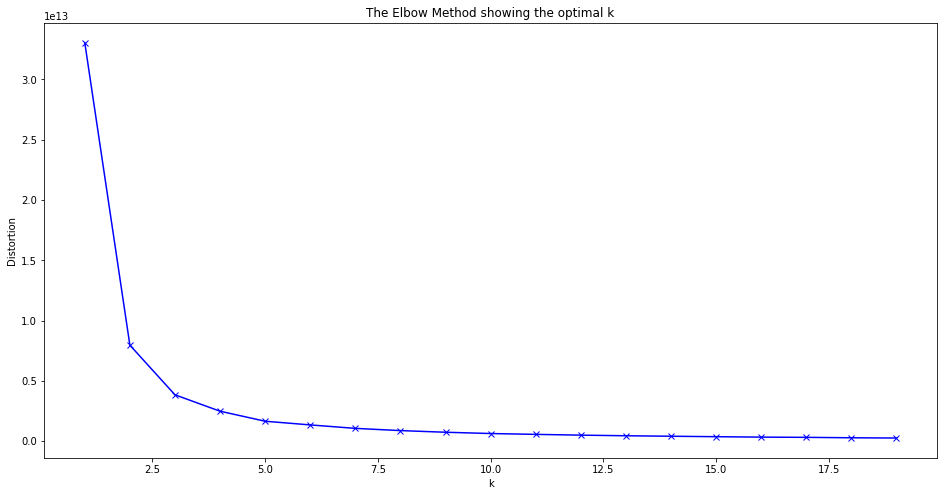

In [72]:
# Calculating distortions for different values of K
distortions = []
K = list(np.arange(1,20,1))
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(taxi_main)
    distortions.append(kmeanModel.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

<b> After K=5, the distortion (or SSE) is not decreasing significantly.</b>

#### Running the K-Means Clustering model

In [288]:
kmeanModel = KMeans(n_clusters=10)
kmeanModel.fit(taxi_main)
taxi_main['k_means']=kmeanModel.predict(taxi_main)

In [289]:
# Extracting the centroid values for both PU and DO points
kmeanModel.cluster_centers_

array([[ 8.02469201e+02,  3.27873045e+01,  8.30535441e+00,
         1.13003975e+01,  9.40641151e+00,  1.30971822e+03,
         2.46812301e+03,  1.69707712e+03,  4.08689033e+01,
        -7.15103083e+01,  4.09634794e+01, -7.26575369e+01,
        -3.58602037e-14],
       [ 2.56134301e+04,  1.64859958e+03,  1.53331928e+00,
         1.21896417e+01,  4.07230301e+00,  3.66371970e+02,
         8.57058809e+04,  1.26051884e+03,  4.01547496e+01,
        -6.82089878e+01,  4.05015351e+01, -6.88569986e+01,
         3.32982086e+00],
       [ 2.92570753e+05,  1.05143750e+04,  4.06250000e-02,
         3.93425000e+01,  1.18677444e+01,  2.32437500e+02,
         8.61320625e+04,  2.21669530e+03,  4.07233776e+01,
        -7.39631172e+01,  4.10421182e+01, -7.41483430e+01,
         2.00000000e+00],
       [ 9.20754694e+04,  7.68929151e+03,  5.89003690e-01,
         2.08603690e+01,  4.13797634e+00,  1.76250923e+02,
         8.61233616e+04,  1.09484388e+03,  4.07856187e+01,
        -7.33089868e+01,  4.06222221e

In [291]:
# Initialising the empty lists
lat_PU = []
long_PU = []
lat_DO = []
long_DO = []

for x in list(np.arange(0,10,1)):
    lat_PU.append(kmeanModel.cluster_centers_[x][8])
    long_PU.append(kmeanModel.cluster_centers_[x][9])
    lat_DO.append(kmeanModel.cluster_centers_[x][10])
    long_DO.append(kmeanModel.cluster_centers_[x][11])

# Combininig the two sets of longitudes and latitudes
## -------CAUTION: Please ensure that the order of list concat is same to ensure the right combination of latitude and longitudes----------#
lat = lat_PU+lat_DO
long = long_PU + long_DO

data = {"latitude": lat, "longitude":long}
data = pd.DataFrame(data)

# Creating a string field column
data["Coordinates"] = data["latitude"].astype(str) +", "+data["longitude"].astype(str) 

In [161]:
loc_ls = []

for x in data["Coordinates"]:
    loc_ls.append(loc.reverse(x))

location = loc.reverse("40.964236247826086, -74.16058748774522")

print(location.address)

252, Pasadena Place, Hawthorne, Passaic County, New Jersey, 07506, United States


### Top performing PU DO combination Data
#### Elbow Curve

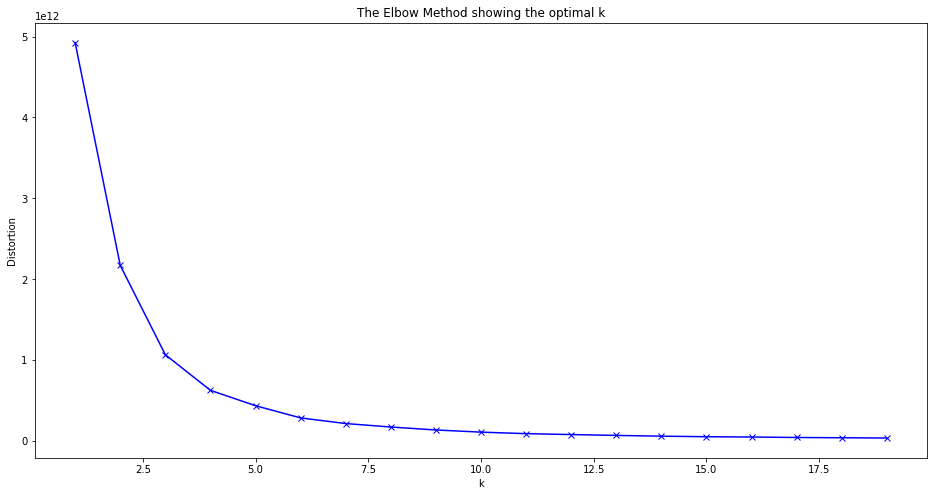

In [245]:
# Calculating distortions for different values of K
distortions = []
K = list(np.arange(1,20,1))
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(top80_20_main)
    distortions.append(kmeanModel.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#### Running the K-means clustering

In [298]:
kmeanModel_2 = KMeans(n_clusters=20)
kmeanModel_2.fit(top80_20_main)
top80_20_main['k_means']=kmeanModel_2.predict(top80_20_main)

In [299]:
# Initialising the empty lists
lat_PU = []
long_PU = []
lat_DO = []
long_DO = []

for x in list(np.arange(0,20,1)):
    lat_PU.append(kmeanModel_2.cluster_centers_[x][0])
    long_PU.append(kmeanModel_2.cluster_centers_[x][1])
    lat_DO.append(kmeanModel_2.cluster_centers_[x][2])
    long_DO.append(kmeanModel_2.cluster_centers_[x][3])

# Combininig the two sets of longitudes and latitudes
## -------CAUTION: Please ensure that the order of list concat is same to ensure the right combination of latitude and longitudes----------#
lat = lat_PU+lat_DO
long = long_PU + long_DO

data_2 = {"latitude": lat, "longitude":long}
data_2 = pd.DataFrame(data_2)

# Creating a string field column
data_2["Coordinates"] = data_2["latitude"].astype(str) +", "+data_2["longitude"].astype(str) 

## Plotting the  coordinates on a map
### Aggregated Data

In [292]:
loc_ls = []

for x in data["Coordinates"]:
    loc_ls.append(loc.reverse(x,timeout=None))

data["Location"] = loc_ls
data = data.dropna()

In [293]:
import folium as fm

map = fm.Map(location=[data.latitude.mean(),
                       data.longitude.mean()],
zoom_start=14, control_scale=True)
             
for index, location_info in data.iterrows():
    fm.Marker([location_info["latitude"], location_info["longitude"]]).add_to(map)

In [294]:
map

### Top performing PU and DO points

In [300]:
loc_ls = []

for x in data_2["Coordinates"]:
    loc_ls.append(loc.reverse(x,timeout=None))

#location = loc.reverse("40.964236247826086, -74.16058748774522")

In [301]:
data_2["Location"] = loc_ls
data_2 = data_2.dropna()

In [302]:
#location = loc.reverse("40.964236247826086, -74.16058748774522")

In [303]:
map2 = fm.Map(location=[data_2.latitude.mean(),
                       data_2.longitude.mean()],
zoom_start=8, control_scale=True)
             
for index, location_info in data_2.iterrows():
    fm.Marker([location_info["latitude"], location_info["longitude"]]).add_to(map2)

In [304]:
map2

data_2